<a href="https://colab.research.google.com/github/Suleymanabdy/Data-Science-Checkpoints./blob/main/Artificial_Neural_Network_Checkpoint_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/fashion-mnist_test.csv.zip

unzip:  cannot find or open /content/fashion-mnist_test.csv.zip, /content/fashion-mnist_test.csv.zip.zip or /content/fashion-mnist_test.csv.zip.ZIP.


In [ ]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# Construct a validation set from the last 10000 images and labels from
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

In [ ]:
# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000:]

In [ ]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

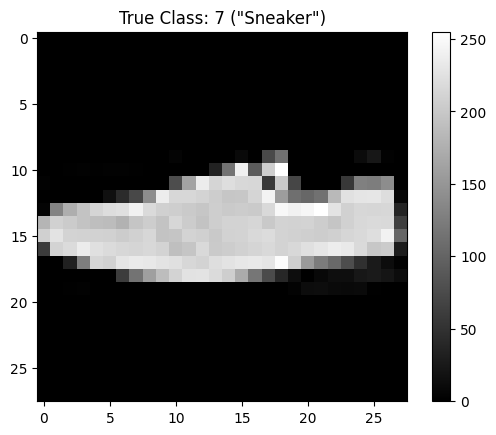

In [ ]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

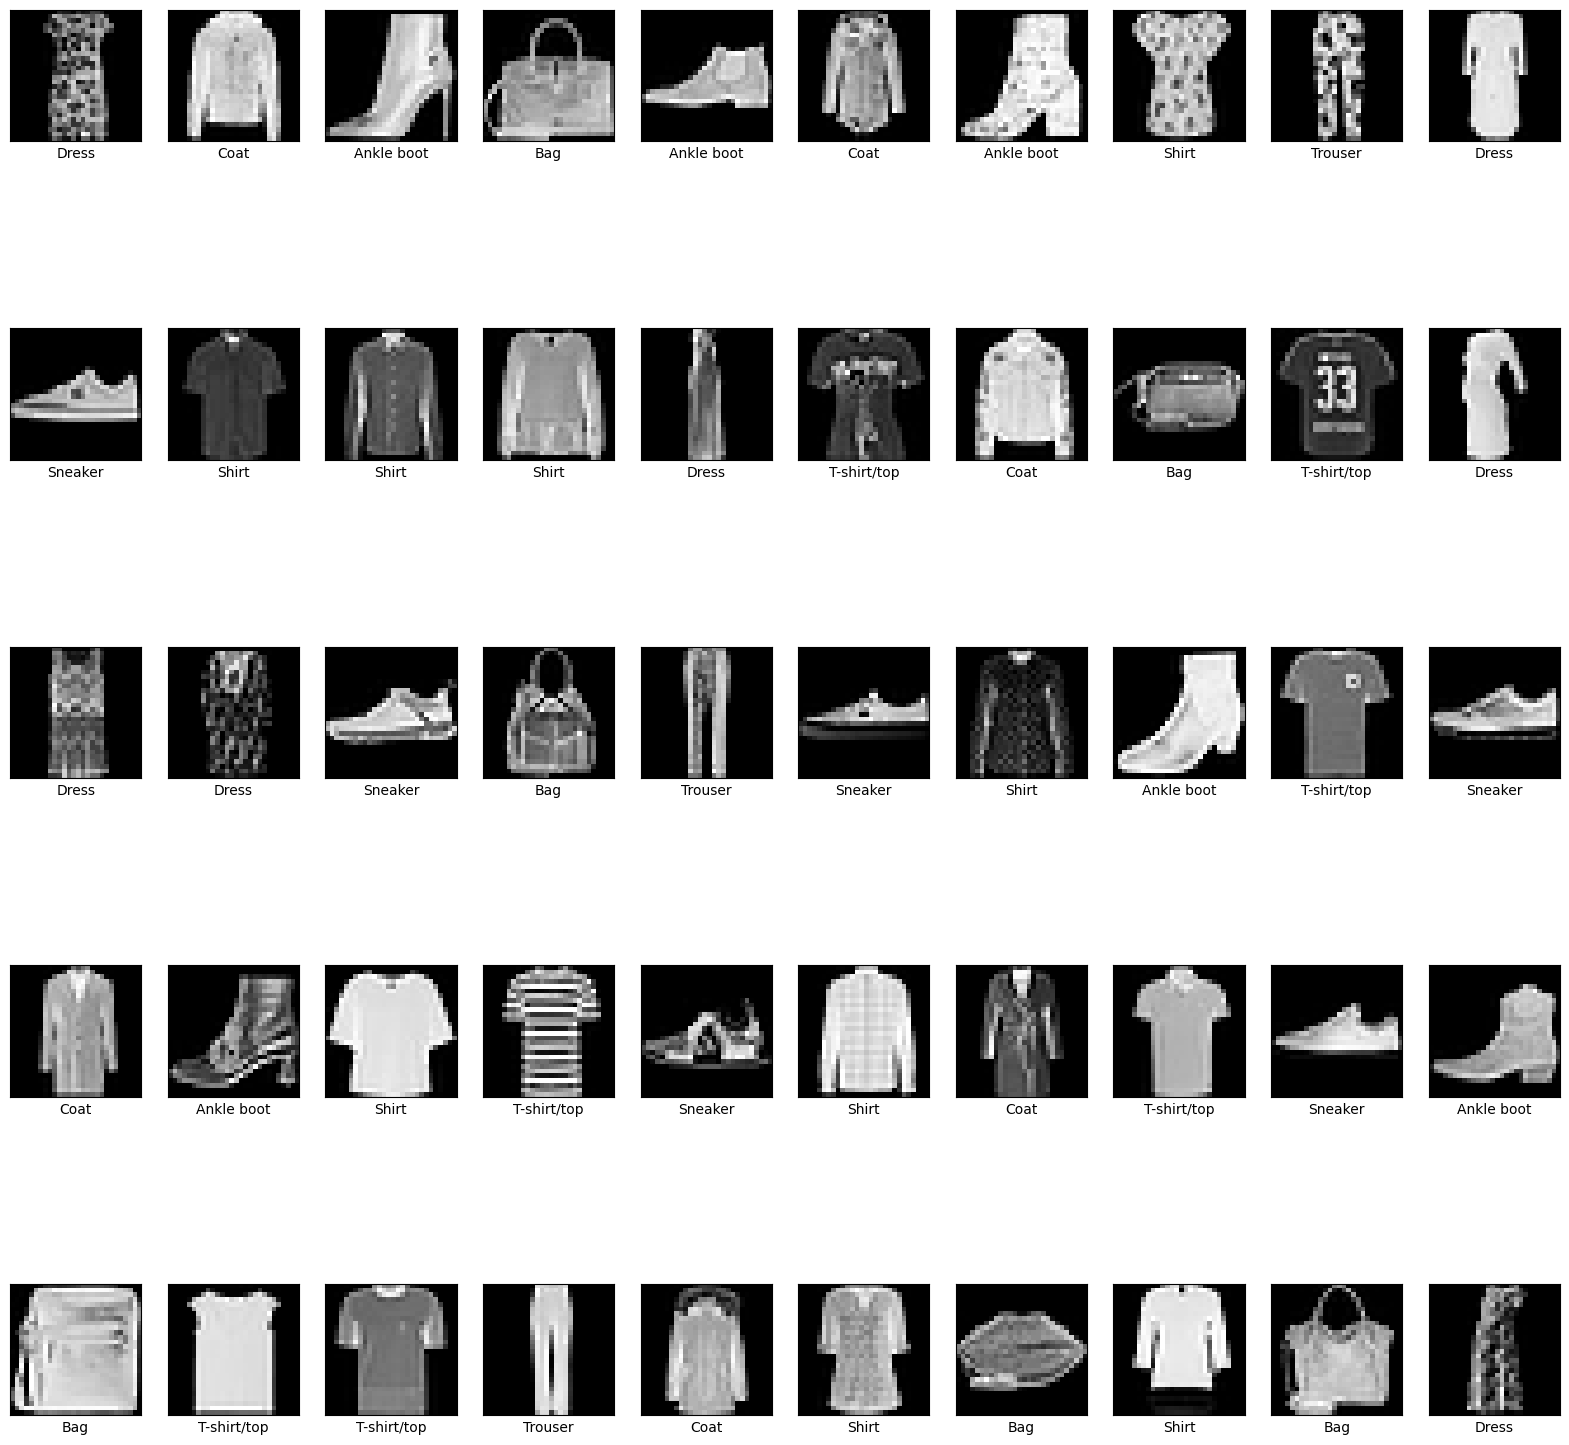

In [ ]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

In [ ]:
#Flatten
train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)

In [ ]:
#Normalize
train_images_model = train_images_flatten/255.
validation_images_model = validation_images_flatten/255
test_images_model = test_images_flatten/255

In [ ]:
#convert class vectors to binary class matrices
train_labels_categ = keras.utils.to_categorical(train_labels, 10)
validation_labels_categ = keras.utils.to_categorical(validation_labels, 10)
test_labels_categ = keras.utils.to_categorical(test_labels, 10)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 40

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
# Print the model summary
model.summary()
# End Code

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))


Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0993 - loss: 8.9867 - val_accuracy: 0.0965 - val_loss: 9.5580
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0963 - loss: 9.3944 - val_accuracy: 0.0968 - val_loss: 9.8030
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0960 - loss: 9.5701 - val_accuracy: 0.0968 - val_loss: 9.8030
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0968 - loss: 9.5181 - val_accuracy: 0.0968 - val_loss: 9.8030
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.0952 - loss: 9.5668 - val_accuracy: 0.0968 - val_loss: 9.8030
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.0959 - loss: 9.5199 - val_accuracy: 0.0968 - val_loss: 9.8030
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.0970 - loss: 9.5976 - val_accuracy: 0.0968 - val_loss: 9.8030
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0973 - loss: 9.5782 - val_accuracy:

In [ ]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.09650000184774399


In [ ]:
test_logits = model.predict(test_images_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
test_logits

array([[-1270.1306 ,  -509.56396, -1513.3069 , ..., -1603.0642 ,
         1796.71   , -1858.0131 ],
       [-4648.8115 , -2536.106  , -5243.2446 , ..., -2846.1199 ,
         5007.758  , -4420.7363 ],
       [-2699.2593 , -1880.4149 , -2808.2314 , ..., -1612.6472 ,
         2902.9856 , -1929.1198 ],
       ...,
       [-1874.322  ,  -828.82   , -1755.484  , ..., -1282.0267 ,
         2200.072  , -1511.465  ],
       [-2083.704  , -1428.1194 , -2131.5603 , ..., -1247.7874 ,
         2253.8044 , -1546.5674 ],
       [-1093.4484 ,  -552.204  , -1259.6056 , ..., -1120.0901 ,
         1371.7767 , -1327.0807 ]], dtype=float32)

In [ ]:

test_predictions = np.argmax(test_logits, axis=1)

In [ ]:
test_predictions

array([5, 5, 5, ..., 5, 5, 5])

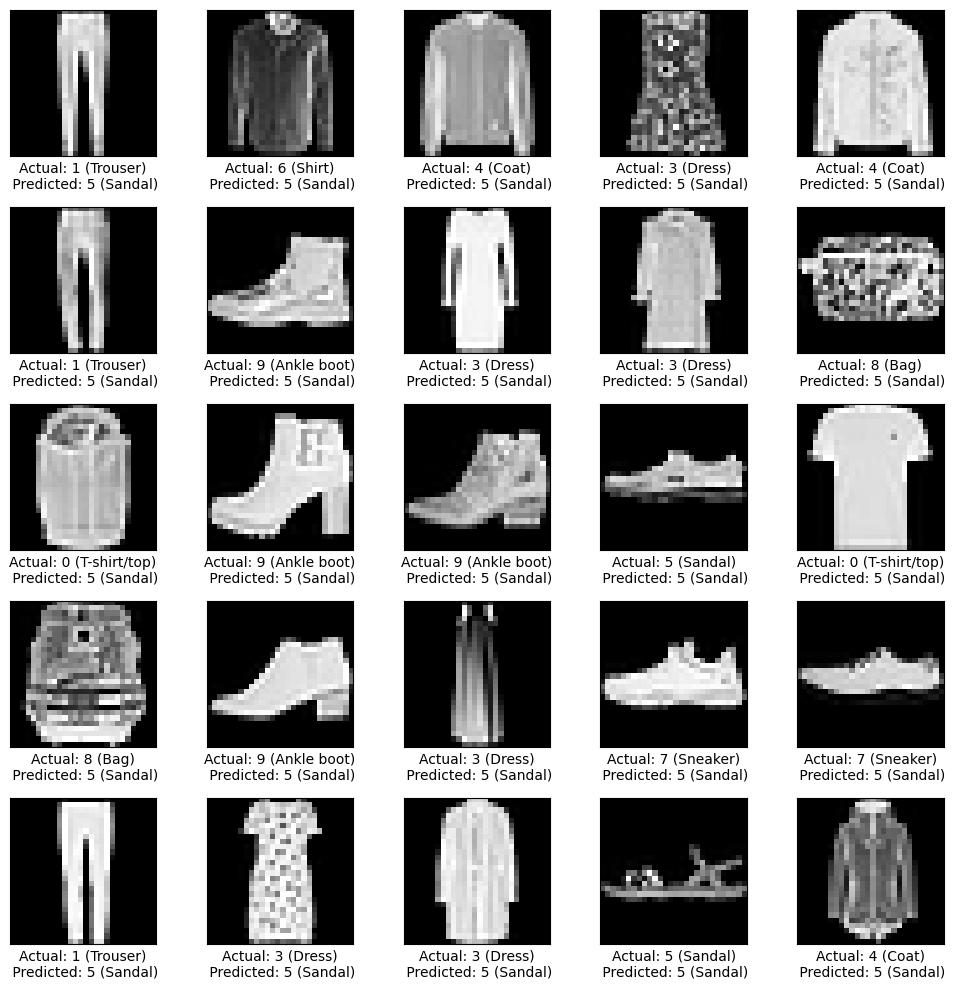

In [ ]:


plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,5,i % 25 + 1) # Use modulo operation to wrap index
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)

    actual_label = int(test_labels[img_index])
    predicted_label = int(test_predictions[img_index])

    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))

plt.tight_layout()
plt.show()